In [1]:
'''
This code makes country level figures from the csv files generated by code 01_tif_to_csv.ipynb
It uses the cartopy library in Python
With cartopy there is no need to open a shapefile because cartopy library can load the basemaps for us 
'''
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [12]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [3]:
vmin = 0
vmax = 10


In [7]:
loc = 'PH'

fp = f'{loc}_0317_0515_2019' 
df = pd.read_csv(f'{fp}.csv') #opens filename fp which are NO2 csv files from the NO2 tif files from code 01_tif_to_csv.ipynb
df['lat'] = df['y']
df['lon'] = df['x']

df_2019 = df

fp = f'{loc}_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']

df_2020 = df

fp = f'{loc}_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']

df_2021 = df

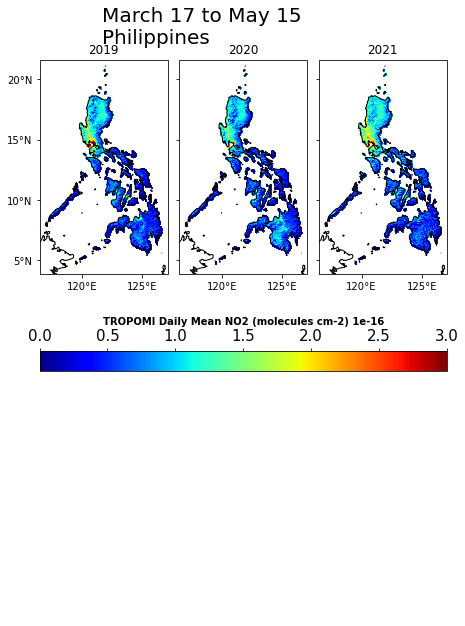

In [17]:
vmax=3  #maximum NO2 value for legend/scale
yu_ = 23  #latitude value for label

a4_dims = (20,20)


s = 0.1
fig = plt.figure(figsize=(8.55,11))
gs = fig.add_gridspec(2, 7,hspace=0.05)#,wspace=-0.51)
ax = fig.add_subplot(gs[0:1, 0:2], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2019['lon'], df_2019['lat'], c=df_2019['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')

plt.autoscale(False)


plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0:1,2:4], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2020['lon'], df_2020['lat'], c=df_2020['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
plt.autoscale(False)

plt.text(110., yu_, 'March 17 to May 15 \nPhilippines', fontsize=20)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0:1,4:6], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2021['lon'], df_2021['lat'], c=df_2021['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s", transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 

plt.autoscale(False)


plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:6])
ax.axis('off')
cbar2 = fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top')
cbar2.set_label(label='TROPOMI Daily Mean NO2 (molecules cm-2) 1e-16', size=10, weight='bold')
cbar2.ax.tick_params(labelsize=15)
 
plt.savefig(f'TROPOMI_NO2_2019_2021_PH.jpg', dpi=500,  facecolor='white', bbox_inches="tight")